# Symbolic computation in Python

We have seen a few examples of symbolic computation in Python. 

 * Defining symbolic expressions, such as:
     - Polynomials
     - Algebraic expressions involving addition, multiplication, and standard mathematical functions like $\sin(x)$ and $e^x$.
     - [Symbolic expressions](numbers.in.python.ipynb) for algebraic number types, such as $\frac{1}{\sqrt{2}+1}$
 * [Differentiation](NA.PI-Newton.ipynb) of symbolic functional expressions. 
 
In these notes we will explore the sympy library a little further, getting an idea for what it can do, how sympy works, and what its limitations are.  


## Features of Sympy

The [features](http://www.sympy.org/en/features.html) of Sympy are vast and the scope of the library is changing rather quickly. It aims to be able to accomplish all forms of symbolic computation that *can* in principle be done by a computer. 

The qualifier in the above sentence is rather important. There are many basic algebraic tasks that are *non-computable*, in the sense that we have proofs that it is *impossible* to write a computer program that computes the answer to certain algebraic problems.  A closely related fact is that many differential equations do not have closed-form solutions, i.e. their solutions are not expressible in terms of *elementary functions*. 

These facts lead to certain unavoidable issues or problems in symbolic computation.  
 * For certain kinds of requests, sympy will try to answer your query, but there are estimates for how long it might take, nor how much system memory it will require to complete the task you have asked of it.  In effect sympy may or may not give you an answer.
 * But sympy *also* has various highly-effective algorithms with solid run-time and memory-usage estimates, meaning many tasks can be accomplished reliably.  
 
We will talk a little about both sorts of algorithms available in sympy.

### Calculus: derivatives and anti-derivatives

Sympy can compute derivatives of symbolic functions, using exactly the same tools we use: 
 * The chain rule 
 * The product rule
 * A table of derivaties of elementary functions, such as $x^n$, $e^x$ and $\sin(x)$. 

In [77]:
## 1) calculus, differentiation, integration, limits.
import sympy as sp
x = sp.Symbol('x')
f = x**3 + sp.sin(x)
print(sp.diff(f,x))

3*x**2 + cos(x)


In [78]:
## We can ask sympy to give a more pleasant presentation
sp.pprint(sp.diff(f,x))

   2         
3⋅x  + cos(x)


In [80]:
## Check a function is a solution to a differential equation.

f = 1/(1 + sp.exp(-x))
fp = sp.diff(f,x)
print("f == "+str(f))
print("f' == "+str(fp)+"\n")

## f' = f(1-f) is an example of a logistic de.  Let's check that the above is a solution
print("Solution to logistic de f'=f(1-f) if: ")
print(str(f*(1-f))+" == "+str(fp)+"\n")

## They do not look equal! Let's ask sympy to check

print("Sympy thinks they are equal: "+str(fp == f*(1-f))+"\n")

## As we saw before, Sympy's "==" operator does not investigate our 
## concern very carefully -- it is essentially telling us whether or not
## the expressions look syntactically the same.  We already know they do not!
## Let's try asking sympy to think a little harder about this.

ode = fp - f*(1-f)
print("Before simplification: ")
sp.pprint(ode)
print("After simplification: ")
ode_reduced = sp.simplify(ode)
sp.pprint(ode_reduced)
print("sp.simplify applied to the difference is zero, so the expressions are equal.")

f == 1/(1 + exp(-x))
f' == exp(-x)/(1 + exp(-x))**2

Solution to logistic de f'=f(1-f) if: 
(1 - 1/(1 + exp(-x)))/(1 + exp(-x)) == exp(-x)/(1 + exp(-x))**2

Sympy thinks they are equal: False

Before simplification: 
         1                
  1 - ───────             
           -x       -x    
      1 + ℯ        ℯ      
- ─────────── + ──────────
         -x              2
    1 + ℯ       ⎛     -x⎞ 
                ⎝1 + ℯ  ⎠ 
After simplification: 
0
sp.simplify applied to the difference is zero, so the expressions are equal.


Sympy also has the capacity to compute anti-derivatives. This is perhaps surprising since there are many functions in mathematics that *do not* have anti-derivatives that are expressable in terms of *elementary functions*.   For example,

$$f(x) = e^{-x^2}$$

can not be expressed as a finite combination (sums, products, powers, quotients) of polynomials or trig functions.  

In [4]:
## let's start with some examples

f = x**5
sp.pprint(f)

 5
x 


In [5]:
af = sp.integrate(f, x)
sp.pprint(af)

 6
x 
──
6 


One does not need to give concrete instances of functions to sympy -- one can ask for general rules as well.  For example.

In [6]:
a,b,c = sp.symbols('a b c')
f = a*x**b+c
sp.pprint(f)
print("")
af = sp.integrate(f,x)
sp.pprint(af)

   b    
a⋅x  + c

  ⎛⎧log(x)  for b = -1⎞      
  ⎜⎪                  ⎟      
  ⎜⎪ b + 1            ⎟      
a⋅⎜⎨x                 ⎟ + c⋅x
  ⎜⎪──────  otherwise ⎟      
  ⎜⎪b + 1             ⎟      
  ⎝⎩                  ⎠      


sympy is perfectly content giving *complicated* answers.  This is a feature of its underlying data type -- a tree.  Notice the type that $\int f$ is.

In [7]:
print("The anti-derivative is of type: "+str(type(af)))

The anti-derivative is of type: <class 'sympy.core.add.Add'>


In [8]:
## right!  the last operation is addition. Let's ask it about the anti-derivative of x^b
print("The anti-derivative of x**b is of type: "+str(type(sp.integrate(x**b,x))))

The anti-derivative of x**b is of type: Piecewise


Let's be mean and ask sympy about $\int e^{-x^2} dx$

In [9]:
f = sp.exp(-x**2)
sp.pprint(f)
fi = sp.integrate(f, x)
sp.pprint(fi)

   2
 -x 
ℯ   
  ___       
╲╱ π ⋅erf(x)
────────────
     2      


This is better than no information at all. sympy is telling us that (a rescaling) of this is called the $erf$ or <a href="http://docs.sympy.org/0.7.1/modules/mpmath/functions/expintegrals.html#erf">*error function*</a>.  Sympy can work with this function. 

In [10]:
f = (x**2)*fi
sp.pprint(f)
sp.pprint(sp.integrate(f,x))

  ___  2       
╲╱ π ⋅x ⋅erf(x)
───────────────
       2       
      ⎛                  2        2 ⎞
      ⎜ 3           2  -x       -x  ⎟
  ___ ⎜x ⋅erf(x)   x ⋅ℯ        ℯ    ⎟
╲╱ π ⋅⎜───────── + ─────── + ───────⎟
      ⎜    3           ___       ___⎟
      ⎝            3⋅╲╱ π    3⋅╲╱ π ⎠
─────────────────────────────────────
                  2                  


We can similarly ask for definite integrals. 

We will request $\int_{-\infty}^\infty e^{-x^2} dx$ below.

In [29]:
defint = sp.integrate( f, (x,-sp.oo,sp.oo))
sp.pprint(defint)
## "oo" -- two letter o's -- is sympy's notation for infinity

  ___   ___
╲╱ 2 ⋅╲╱ π 
───────────
     2     


Let's also request $\int_{-1}^1 e^{-x^2} dx$

In [30]:
defint = sp.integrate( f,(x,-1,1))
sp.pprint(defint)
## and if we are not content with such abstract stuff, we can request a float approximation
print("To 40 decimal places: "+str(defint.evalf(40)))

                      ⎛  ___⎞       
    ___   ___         ⎜╲╱ 2 ⎟       
3⋅╲╱ 2 ⋅╲╱ π ⋅fresnels⎜─────⎟⋅Γ(3/4)
                      ⎜  ___⎟       
                      ⎝╲╱ π ⎠       
────────────────────────────────────
              4⋅Γ(7/4)              
To 40 decimal places: 0.6205366034467622036163048463307930151490


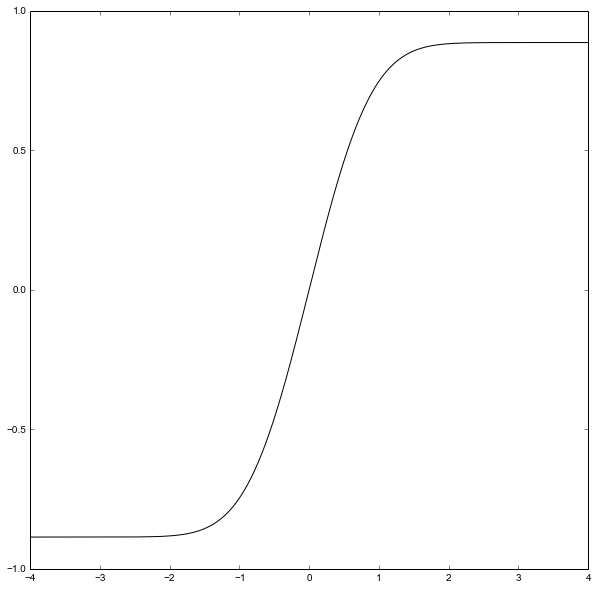

In [13]:
## Let's plot erf.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
%matplotlib inline

## notice we can not use "numpy" here as the erf function
## is not defined in that library.  We could also use
## mpmath here.
FI = sp.lambdify(x, fi, "math")
fig, ax1 = plt.subplots(nrows=1, figsize=(10,10))
res = 1000
dom = [4.0*(float(i)/res-1.0) for i in range(2*res)]
ax1.plot(dom, [FI(p) for p in dom], color="black")
plt.show()

In [14]:
# A small variant on the above, let's try to graph the anti-derivative of sin(x^2)
f = sp.sin(x**2)
fi = sp.integrate(f,x)
sp.pprint(fi)

                      ⎛  ___  ⎞       
    ___   ___         ⎜╲╱ 2 ⋅x⎟       
3⋅╲╱ 2 ⋅╲╱ π ⋅fresnels⎜───────⎟⋅Γ(3/4)
                      ⎜   ___ ⎟       
                      ⎝ ╲╱ π  ⎠       
──────────────────────────────────────
               8⋅Γ(7/4)               


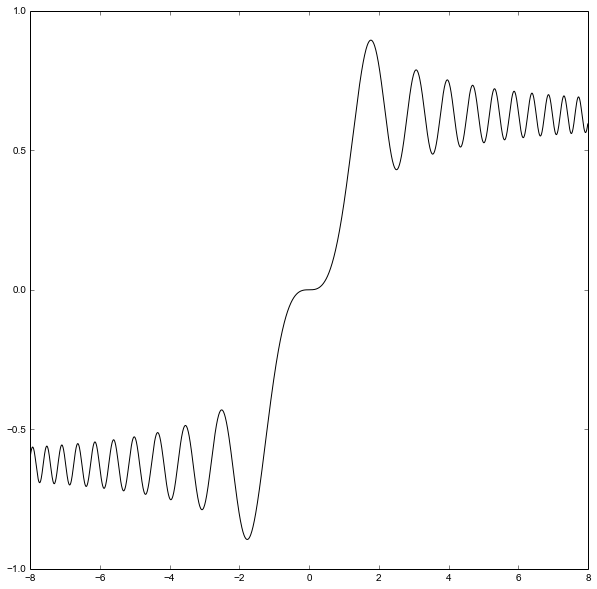

In [15]:
fig, ax1 = plt.subplots(nrows=1, figsize=(10,10))
res = 1000
dom = [8.0*(float(i)/res-1.0) for i in range(2*res)]
## the fresnel function is not implement in numpy or math, so
## we need to use mpmath
FI = sp.lambdify(x, fi, "mpmath")
ax1.plot(dom, [FI(p) for p in dom], color="black")
plt.show()

From the above graph it would appear the Fresnel function has a pair of horizontal
asymptotes. We can ask sympy to check this. 


In [31]:
lim = sp.limit(fi,x, sp.oo)
print( lim )
## pretty?
sp.pprint( lim )
## and a float?
print("As a float (mpf): "+str(lim.evalf(40)))

3*sqrt(2)*sqrt(pi)*gamma(3/4)/(16*gamma(7/4))
    ___   ___       
3⋅╲╱ 2 ⋅╲╱ π ⋅Γ(3/4)
────────────────────
     16⋅Γ(7/4)      
As a float (mpf): 0.6266570686577501256039413212027613132517


### Keep in mind sympy can fail!  Let's look at what that looks like.

We will ask it to evaluate a slightly more complicated integral:

$$ \int e^{e^{-x^2}} dx $$

In [17]:
sp.pprint( sp.integrate(sp.exp(sp.exp(-x**2)),x) )

⌠           
⎮  ⎛   2⎞   
⎮  ⎜ -x ⎟   
⎮  ⎝ℯ   ⎠   
⎮ ℯ       dx
⌡           


i.e. when sympy fails on these kinds of requests, it **gives up** and returns your original input, *unchanged*. 

What is going on *under the hood* is that sympy is using something called the <a href="https://en.wikipedia.org/wiki/Risch_algorithm">**Risch algorithm**</a>. Technically sympy has developed an extension of it. . . and sympy's extension what is known as a *semi-algorithm*.  As far as I am aware, every software package that can compute symbolic integrals (Mathematical, Matlab, Maple, etc) all use variants of the Risch algorithm. 

The Risch algorithm converts an integration problem into a problem of determining equality of elements in something called a *differential algebra*.  In Risch's original paper he confined himself to a fairly simple class of elementary functions on which his work provides a genuine algorithm. Sympy, on the other hand, has looser constraints than Risch's original paper and so it does not know how to solve this problem for every possible input. Sympy can fail, which is why it is called a semi-algorithm.

When you provide sympy with a *difficult* integral that it does not know how to handle immediately, it spends some time *searching* for an answer, but if it does not find one quickly it gives up. 

Sympy's extensions to the Risch algorithm are some of the most commonly-used anti-derivatives, such as $erf$ and the Fresnel function.

## Asking sympy to solve equations

Sympy has some fairly sophisticated algorithms to solve polynomial equations. It uses this intelligence for solving polynomial equations to build tools to solve (symbolically) a wide array of equations, even ones that are not polynomial. 

Sympy can:

 * Factor polynomials.
 * Find roots of polynomials, symbolically as well as numerically. 
 * Solve (symbolically as well as numerically) simultaneous polynomial equations.
 * Solve simultaneous equations that are not polynomial
     - sympy can *sometimes* do this symbolically
     - can usually do this numerically, using a variety of methods, including the multi-variable Newton's method.  The numeric methods are not always guanteed to find all solutions. If you *need* all solutions you might have to use more specialized methods. 
 * Sympy's polynomial equation solvers, on the other hand, will always find good approximations to all the solutions.


In [18]:
## Let's give an example of factoring polynomials

p = x**2 - 2*x + 1
sp.factor(p)

(x - 1)**2

In [19]:
## Sympy is okay with multi-variable polynomials
y = sp.Symbol('y')

p = x*y - x - y + 1
sp.factor(p)

(x - 1)*(y - 1)

In [20]:
## We can also ask to factor in a variety of ways

p = x*x - 2
sp.pprint(sp.factor(p))
## the above is factoring using rational numbers i.e. the output is telling us you can 
## not factor this polynomial into a product of two polynomials with rational coefficients.

sp.pprint(sp.factor(p, extension=sp.sqrt(2)))
## here we have allowed simpy to use the square root of 2 in the coefficients,
## so it gives us what we expect.

 2    
x  - 2
⎛      ___⎞ ⎛      ___⎞
⎝x - ╲╱ 2 ⎠⋅⎝x + ╲╱ 2 ⎠


In [88]:
## a few more examples of sympy's factoring code
p = x*x + 2
sp.pprint(sp.factor(p))
## here we allow sqrt(2)i in the coefficients
sp.pprint(sp.factor(p, extension=sp.sqrt(-2)))
p = x*x + 1
## and here we allow "Gaussian integers" i.e. complex
## numbers of the form a+bi with a and b integers.
sp.pprint(sp.factor(p, gaussian=True))

 2    
x  + 2
⎛      ___  ⎞ ⎛      ___  ⎞
⎝x - ╲╱ 2 ⋅ⅈ⎠⋅⎝x + ╲╱ 2 ⋅ⅈ⎠
(x - ⅈ)⋅(x + ⅈ)


The nice thing about the previous algorithms is they always work.  The weak aspect is it is not particularly flexible if your goal is to know the roots of the polynomial. To find the roots, we can use sympy's solve function.

In [89]:
p = x*x - 2
sp.pprint(sp.solve(p,x))

p = x*x + 2
sp.pprint(sp.solve(p,x))

⎡   ___    ___⎤
⎣-╲╱ 2 , ╲╱ 2 ⎦
⎡   ___      ___  ⎤
⎣-╲╱ 2 ⋅ⅈ, ╲╱ 2 ⋅ⅈ⎦


### sympy solve

The general format is to call $solve(f,x)$ where $f$ is a sympy expression -- a function -- and $x$ is the variable used by that function.  Sympy will attempt to find all the solutions to the equation
$$f(x) = 0$$

The solve algorithm runs out of steam fairly quickly. See the next three computations.


In [22]:
p = a*x**2 + b*x + c
sp.pprint(p)
sp.pprint(sp.solve(p,x))

   2          
a⋅x  + b⋅x + c
⎡        _____________   ⎛       _____________⎞ ⎤
⎢       ╱           2    ⎜      ╱           2 ⎟ ⎥
⎢-b + ╲╱  -4⋅a⋅c + b    -⎝b + ╲╱  -4⋅a⋅c + b  ⎠ ⎥
⎢─────────────────────, ────────────────────────⎥
⎣         2⋅a                     2⋅a           ⎦


In [23]:
## a general cubic
d,e = sp.symbols('d e')
p = a*x**3 + b*x**2 + c*x + d
sp.pprint(p)
sp.pprint(sp.solve(p,x))

   3      2          
a⋅x  + b⋅x  + c⋅x + d
⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                            2                                
⎢                                     c     b                                 
⎢                                    ─── - ────                               
⎢                                    3⋅a      2                               
⎢                                          9⋅a                                
⎢─────────────────────────────────────────────────────────────────────────────
⎢           __________________________________________________________________
⎢          ╱           _____________________________________                  
⎢         ╱           ╱                                   2                   
⎢       

In [24]:
## a general quartic. 
p = a*x**4 + b*x**3 + c*x**2 + d*x + e
sp.pprint(p)
sp.pprint(sp.solve(p,x))

   4      3      2          
a⋅x  + b⋅x  + c⋅x  + d⋅x + e


PolynomialError: cannot return general quartic solution

While there is a closed-form solution to the roots of a degree 4 polynomial, sympy's *solve* routine can not derive it.  

On the other hand it is known there is no *closed form* for the roots of a degree $5$ or higher polynomial.  So one has to resort to other methods.

In [32]:
## let's leave sympy and find the roots numerically
p = x**3 + x**2 - x - 1
P = sp.Poly(p,x).coeffs()
print("The extracted coefficients: "+str(P))
P=[1, -12,48,-64, 0]

The extracted coefficients: [1, 1, -1, -1]


In [28]:
## Both numpy and mpmath have such algorithms
print(str(np.roots(P))+"\n")
## mpmath's
import sympy.mpmath as mp
print(str(mp.polyroots(P))+"\n")
## clean up the output
mp.mp.pretty = True
print(str(mp.polyroots(P))+"\n")
## up the precision
mp.mp.prec += 3 ## dps should be approximately at least 3.33 times prec
mp.mp.dps += 10
print(str(mp.polyroots(P))+"\n")


[ 4.000021 +3.63759237e-05j  4.000021 -3.63759237e-05j
  3.999958 +0.00000000e+00j  0.000000 +0.00000000e+00j]

[-1.956900190841893261617e-31, (3.9999999975825139634193 + 7.8110601685038604800699e-10j), (4.0000000026732335135902 - 1.5102489811480045947119e-9j), (3.9999999995397004119895 + 1.3411824332007288203794e-8j)]

[-1.956900190841893261617e-31, (3.9999999975825139634193 + 7.8110601685038604800699e-10j), (4.0000000026732335135902 - 1.5102489811480045947119e-9j), (3.9999999995397004119895 + 1.3411824332007288203794e-8j)]

[-4.433784025372954969908392235236119e-44, (4.000000000016828878304623263547906 - 6.639006126578153803338059987427709e-12j), (3.999999999983232653012337146110706 - 1.382058276773290423911123908606283e-11j), (3.999999999998048809029032298445315 + 1.493509366453125559535586531804227e-11j)]



## roots

The sympy *polyroots* and numpy *roots* functions are guanteed to find all the solutions of your polynomial equation.  

* * * 

While we're at it, notice mpmath can be used to solve multi-variable equations.

Here we ask mpmath to solve
$$(x^2+y^2, xy) = (4, 1)$$

It is using a multi-variable Newton method.

In [76]:
f = [lambda x,y: x**2 + y**2 - 4, lambda x, y: x*y-1.0 ]
## The mpmath findroot algorithm can take lists of multi-variable functions. 
## i.e. it prefers to think of a vector-valued function as a list of functions
## and solving the equation f(x,y) = (0,0) it thinks as solving the list of
## equations simultaneously. 

#print(f[0](1,1),f[1](1,1))
# as it looks, f is a list of callable 2-variable functions

## and the findroot call
roots = mp.findroot(f,(0.2,0.1))
print("roots: "+str(roots))
## let's check it is a solution
print("check sol: "+str(f[0](roots[0],roots[1])) + ", " +str(f[1](roots[0],roots[1])) )
print("yes!")

roots: [ 1.931851652578136573499486399457795]
[0.5176380902050415246977976752480967]
check sol: 0.0, 0.0
yes!


We can similarly ask sympy to solve families of equations.

In [62]:
sol = sp.solve([x**2 + y**2 - 4, x*y-1 ])
print(type(sol))
print(len(sol))

4


In [68]:
for i in range(len(sol)): 
    print("Solution " + str(i))
    sp.pprint(sol[i])
    print("\n")

Solution 0
⎧   ⎛        _____________⎞    _____________ ⎛     _____________    ⎞         
⎨   ⎜       ╱     ___     ⎟   ╱     ___      ⎜    ╱     ___         ⎟        ╱
⎩x: ⎝-2 - ╲╱  - ╲╱ 3  + 2 ⎠⋅╲╱  - ╲╱ 3  + 2 ⋅⎝- ╲╱  - ╲╱ 3  + 2  + 2⎠, y: -╲╱ 

_____________⎫
     ___     ⎬
 - ╲╱ 3  + 2 ⎭


Solution 1
⎧    ⎛        _____________⎞    _____________ ⎛   _____________    ⎞        __
⎨    ⎜       ╱     ___     ⎟   ╱     ___      ⎜  ╱     ___         ⎟       ╱  
⎩x: -⎝-2 + ╲╱  - ╲╱ 3  + 2 ⎠⋅╲╱  - ╲╱ 3  + 2 ⋅⎝╲╱  - ╲╱ 3  + 2  + 2⎠, y: ╲╱  -

___________⎫
   ___     ⎬
 ╲╱ 3  + 2 ⎭


Solution 2
⎧   ⎛        ___________⎞    ___________ ⎛     ___________    ⎞         ______
⎨   ⎜       ╱   ___     ⎟   ╱   ___      ⎜    ╱   ___         ⎟        ╱   ___
⎩x: ⎝-2 - ╲╱  ╲╱ 3  + 2 ⎠⋅╲╱  ╲╱ 3  + 2 ⋅⎝- ╲╱  ╲╱ 3  + 2  + 2⎠, y: -╲╱  ╲╱ 3 

_____⎫
     ⎬
 + 2 ⎭


Solution 3
⎧    ⎛        ___________⎞    ___________ ⎛   ___________    ⎞        ________
⎨    ⎜       ╱   ___     ⎟   ╱   ___      ⎜  ╱   ___

The next example gives you a sense for how simpy solves complicated algebraic equations. 

Notice the equation below is basically the previous equation but with $x$ replaced by $\cos(x)$ and $y$ replaced by $\sin(y)$. 

In [92]:
sol = sp.solve([sp.cos(x)**2 + sp.sin(y)**2 - 4, sp.cos(x)*sp.sin(y)-1 ])
print(type(sol))
print(len(sol))
for i in range(len(sol)): 
    print("Solution " + str(i))
    sp.pprint(sol[i])
    print("\n")

<type 'list'>
16
Solution 0
⎧                                        ⎛   _____________⎞    ⎫
⎪             ⎛      -1        ⎞         ⎜  ╱     ___     ⎟    ⎪
⎪x: 2⋅π - acos⎜────────────────⎟, y: asin⎝╲╱  - ╲╱ 3  + 2 ⎠ + π⎪
⎨             ⎜   _____________⎟                               ⎬
⎪             ⎜  ╱     ___     ⎟                               ⎪
⎪             ⎝╲╱  - ╲╱ 3  + 2 ⎠                               ⎪
⎩                                                              ⎭


Solution 1
⎧                                         ⎛   _____________⎞⎫
⎪             ⎛      -1        ⎞          ⎜  ╱     ___     ⎟⎪
⎪x: 2⋅π - acos⎜────────────────⎟, y: -asin⎝╲╱  - ╲╱ 3  + 2 ⎠⎪
⎨             ⎜   _____________⎟                            ⎬
⎪             ⎜  ╱     ___     ⎟                            ⎪
⎪             ⎝╲╱  - ╲╱ 3  + 2 ⎠                            ⎪
⎩                                                           ⎭


Solution 2
⎧                                          ⎛   __________

## Sympy and linear algebra

We've seen how one can solve systems of linear equations using numpy's matrix facilities. Sympy has the same abilities but it can also do a few things numpy can not. 

For instance, a standard family of ODEs that arise are called **linear first-order differential equations**. They have the form:

$$\vec v'(t) = A \vec v(t)$$

here $\vec v : \mathbb R \to \mathbb R^n$ is a time-varying vector.  $A$ is an $n \times n$ matrix.  The solutions to these differential equations are:

$$\vec v(t) = exp(A) \vec v_0$$
where $\vec v_0 = \vec v(0)$ and the matrix exponential $exp(A)$ is 
$$\exp(A) = \sum_{k=0}^\infty \frac{1}{k!} A^k$$

Sympy is perfectly happy computing this matrix exponentials in closed-form.  In *math 342* we teach students how to do this by using *ideas*. 

In [115]:
t=sp.Symbol('t')

A=sp.Matrix(2,2,[1,0,0,1])
print("A == "+str(A)+"\n")
eA = sp.exp(t*A)
print("exp(tA)\n")
sp.pprint(eA)

A=sp.Matrix(2,2,[-1,0,1,-1])
print("A == "+str(A)+"\n")
eA = sp.exp(t*A)
print("exp(tA)\n")
sp.pprint(eA)


A == Matrix([[1, 0], [0, 1]])

exp(tA)

⎡ t    ⎤
⎢ℯ   0 ⎥
⎢      ⎥
⎢     t⎥
⎣0   ℯ ⎦
A == Matrix([[-1, 0], [1, -1]])

exp(tA)

⎡  -t      ⎤
⎢ ℯ      0 ⎥
⎢          ⎥
⎢   -t   -t⎥
⎣t⋅ℯ    ℯ  ⎦


In [133]:
## we need to tell sympy t is a real variable otherwise...
t=sp.Symbol('t',real=True)
B=sp.Matrix(4,4,[1,0,0,0, 1,1,0,0, 0,0,1,1, 0,0,-1,1])
eB = sp.exp(t*B)
print("B == "+str(B)+"\n")
## when we expand e^(x+iy) = cos(x) + i sin(y) in the argument
## on the nextline, it thinks t might have both a real and an imaginary part,
## resulting in a true but not-fully-informative expression.
sp.init_printing(use_latex=True)

eB=sp.simplify(eB).expand(complex=True)
sp.pprint(eB)

B == Matrix([[1, 0, 0, 0], [1, 1, 0, 0], [0, 0, 1, 1], [0, 0, -1, 1]])

⎡  t                            ⎤
⎢ ℯ    0       0           0    ⎥
⎢                               ⎥
⎢   t   t                       ⎥
⎢t⋅ℯ   ℯ       0           0    ⎥
⎢                               ⎥
⎢           t           t       ⎥
⎢ 0    0   ℯ ⋅cos(t)   ℯ ⋅sin(t)⎥
⎢                               ⎥
⎢            t          t       ⎥
⎣ 0    0   -ℯ ⋅sin(t)  ℯ ⋅cos(t)⎦


## Plotting in sympy

Sympy has a variety of 2d and 3d plotting tools.  We demonstrate a few below. 

My first impression is they are not as well-developed as one might hope. 

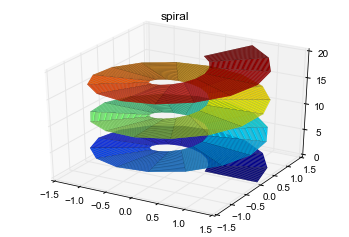

In [209]:
## Parametric surfaces
from sympy.plotting import plot3d_parametric_surface
plot3d_parametric_surface(x*sp.cos(t), x*sp.sin(t), t, 
                          (x,0.5,1.5), (t, 0, 20),
                          title="spiral")

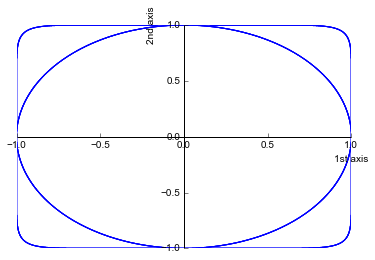

In [174]:
## implicit curves in the plane. 
## here we plot two curves together, 
## we call the individual plots, set them to the variables
## curve1 and curve2, and we ask sympy not to display them when
## they are created. We then merge them with the "extend" command, 
## and display
from sympy.plotting import plot_implicit
curve1 = plot_implicit(x**12+y**12 - 1,(x,-1,1),(y,-1,1), 
              adaptive=False, points=1600, 
              xlabel="1st axis", ylabel="2nd axis", show=False)
curve2 = plot_implicit(x**2+y**2 - 1,(x,-1,1),(y,-1,1), 
              adaptive=False, points=1600, 
              xlabel="1st axis", ylabel="2nd axis", show=False)
curve1.extend(curve2)
curve1.show()

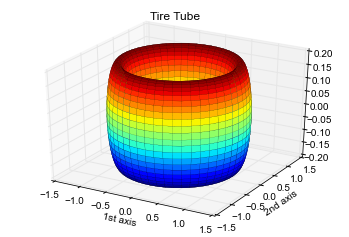

In [170]:
## Let's plot a tire tube...
bigR = 1.0
smR = 0.2
plot3d_parametric_surface(
    (bigR+smR*sp.cos(x))*sp.cos(t),     (bigR+smR*sp.cos(x))*sp.sin(t),     smR*sp.sin(x), 
    (x,0, 6.3), (t, 0, 6.3), 
    title="Tire Tube", xlabel="1st axis", ylabel="2nd axis")